# Table of Contents
 <p><div class="lev1 toc-item"><a href="#https://www.quantinsti.com/blog/build-technical-indicators-in-python/" data-toc-modified-id="https://www.quantinsti.com/blog/build-technical-indicators-in-python/-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><a href="https://www.quantinsti.com/blog/build-technical-indicators-in-python/" target="_blank">https://www.quantinsti.com/blog/build-technical-indicators-in-python/</a></a></div>

# https://www.quantinsti.com/blog/build-technical-indicators-in-python/

In [1]:
%matplotlib inline
import sys
sys.path.append('../')
import JSONData.tdx_data_Day as tdd
# data = tdd.get_tdx_Exp_day_to_df('999999',dl=200).sort_index(ascending=True)
data = tdd.get_tdx_append_now_df_api('999999',dl=30).sort_index(ascending=False)
data[:2]

In [2]:
data.sort_index(ascending=True,inplace=True)
data.rename(columns={'close': 'Close','high': 'High','low': 'Low','open': 'Open'}, inplace=True)
# data = data.iloc[:,1:5]
# data[:2]

[None, None, None, None, None, None, None]

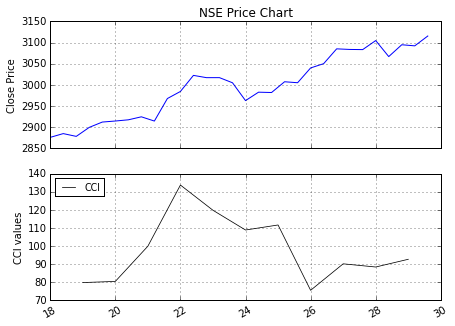

In [3]:
# Commodity Channel Index Python Code

# Load the necessary packages and modules
# from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
# import fix_yahoo_finance
import pandas as pd

data.rename
# Commodity Channel Index 
def CCI(data, ndays): 
 TP = (data['High'] + data['Low'] + data['Close']) / 3 
 CCI = pd.Series((TP - pd.rolling_mean(TP, ndays)) / (0.015 * pd.rolling_std(TP, ndays)),
 name = 'CCI') 
 data = data.join(CCI) 
 return data

# Retrieve the Nifty data from Yahoo finance:
# data = pdr.get_data_yahoo("^NSEI", start="2014-01-01", end="2016-01-01") 
# data = pd.DataFrame(data)

# Compute the Commodity Channel Index(CCI) for NIFTY based on the 20-day Moving average
n = 20
NIFTY_CCI = CCI(data, n)
CCI = NIFTY_CCI['CCI']

# Plotting the Price Series chart and the Commodity Channel index below
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(2, 1, 1)
ax.set_xticklabels([])
plt.plot(data['Close'],lw=1)
plt.title('NSE Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
bx = fig.add_subplot(2, 1, 2)
plt.plot(CCI,'k',lw=0.75,linestyle='-',label='CCI')
plt.legend(loc=2,prop={'size':9.5})
plt.ylabel('CCI values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)